# Data Analysis Covid-19
### Hello I am Shamanth
 
I have done some data analysis project about the corona virus impact in India. the datasets contain data till march 29. 
Again this is just a simple project to show off my skills.

<ul> <h1>Some of the  observation</h1>
    <li> Total cases till march 29 is arount 729</li>
    <li> Active cases till march 29 is arount 665</li>
    </ul>

In [1]:
import plotly
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import folium # for using maps 
import cufflinks as cf # it will connects the pands to plotly
import plotly.offline as po
from plotly.offline import init_notebook_mode,plot,iplot
from matplotlib import style 
style.use('ggplot')
import numpy as np

In [2]:
po.init_notebook_mode(connected=True)
cf.go_offline()

<p> Dropping the unnecessary columns and adding Total row</p>

In [3]:
df=pd.read_excel(r'C:\Users\Joker\Desktop\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\Covid cases in India.xlsx')
df.drop(['S. No.'],axis=1,inplace=True)
df['Total_Cases']=df['Total Confirmed cases (Indian National)']+df["Total Confirmed cases ( Foreign National )"]

In [4]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [5]:
Total_cases_till_march29=df['Total_Cases'].sum()
Total_cases_till_march29

729

In [6]:
df['Active_case']=df['Total_Cases']-df['Cured']
df['Active_case'].sum()

665

In [7]:
#creating the heatmap for understanding some of the data.
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_Cases,Active_case
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [8]:
#heatmaps for only active cases
Total_active_cases=df.groupby("Name of State / UT")['Active_case'].sum().sort_values(ascending=False).to_frame()
Total_active_cases.style.background_gradient(cmap="Reds")

,Active_case
Name of State / UT,
Maharashtra,132
Kerala,127
Telengana,44
Gujarat,43
Rajasthan,40
Tamil Nadu,34
Delhi,33
Uttar Pradesh,32
Punjab,29


<h1> Plotting Graphs </h1>

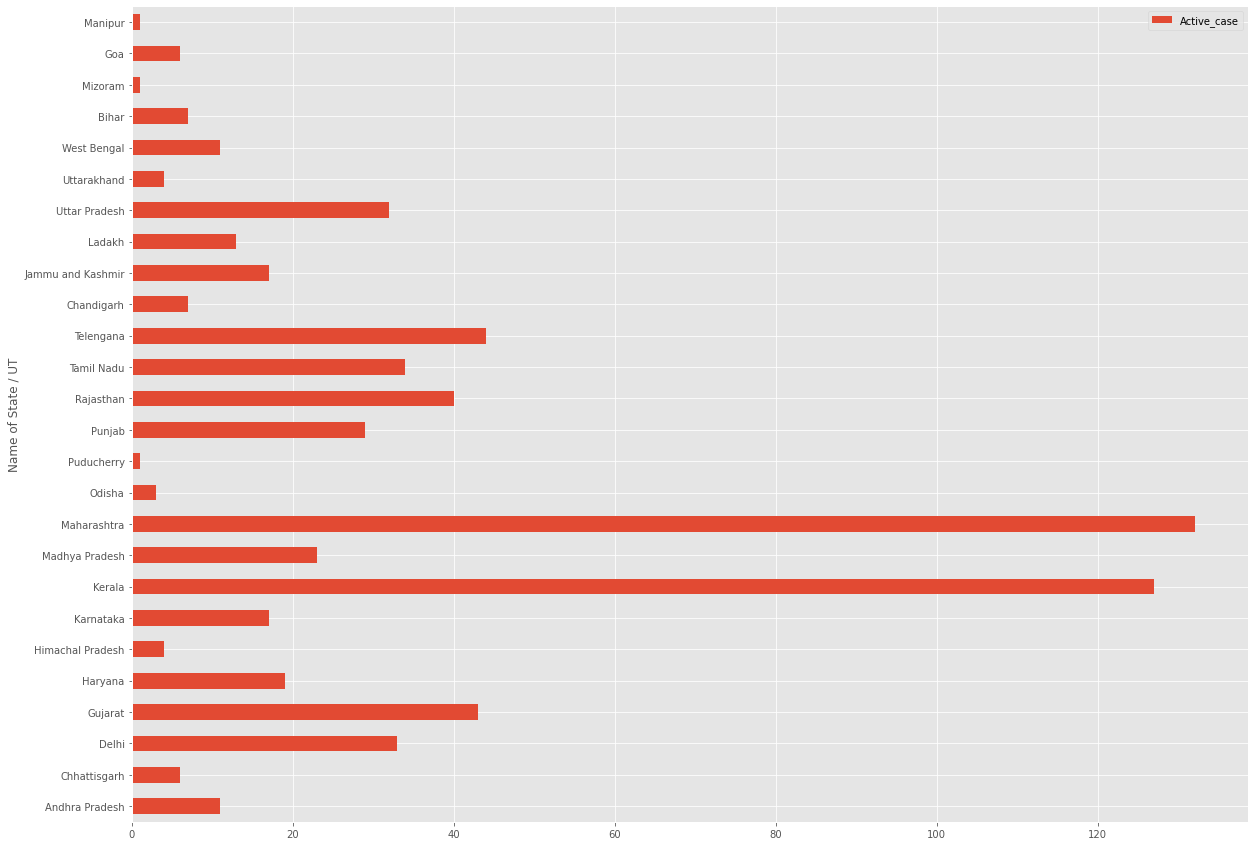

In [9]:
# plotting Bar graph with artistic layer pandas. drawing horizontal bar graph.
df.plot(kind="barh",x='Name of State / UT' ,y='Active_case',figsize=(20,15))
plt.show()


In [10]:
#ploty graph
df.iplot(kind="bar",x='Name of State / UT' 
         ,y='Active_case')

In [11]:
# cured cases
px.bar(df,x='Name of State / UT',
       y="Cured",title="Cured cases")

In [12]:
#scatter plot total deaths state wise
df.iplot(kind="scatter",x='Name of State / UT' ,
         y='Death',title='State wise corona active cases',
         xTitle='States',yTitle='Number of cases',colors='red')

In [13]:
# plotly express total case graph
px.scatter(df,x='Name of State / UT',y='Total_Cases',
             )

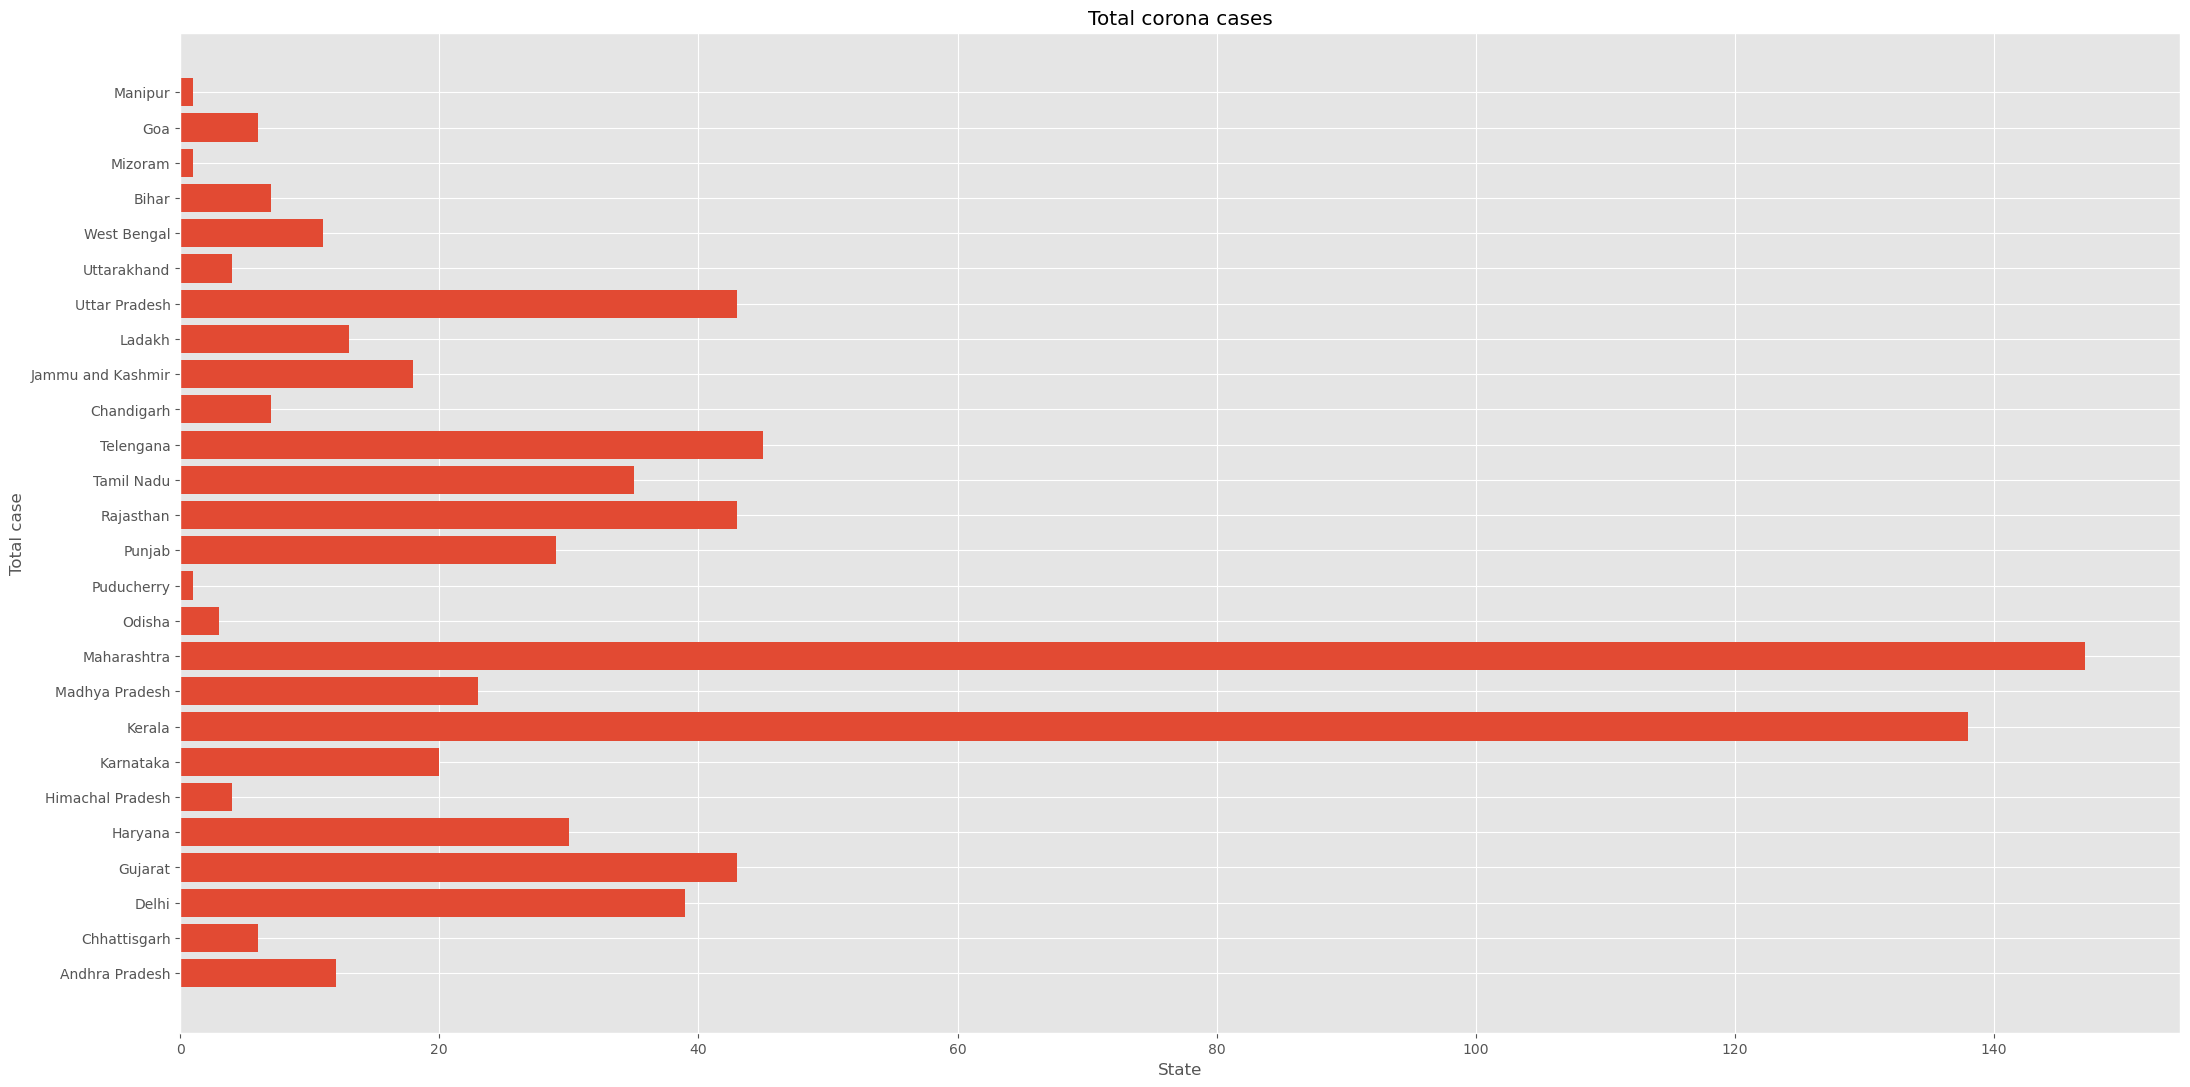

In [14]:
#using matplotlib 
style.use('ggplot')
fig=plt.figure(figsize=(20,10),dpi=100)
ax=fig.add_axes([0,0,1,1])
ax.barh(df['Name of State / UT'],df['Total_Cases'])
ax.set_title("Total corona cases")
ax.set_xlabel("State")
ax.set_ylabel("Total case")
plt.show()

In [15]:
# total deaths bar chart
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Death']))
fig.update_layout(title="Total Deatgs", xaxis=dict(title="State"),yaxis=dict(title="Deaths"))


In [16]:
df_cord=pd.read_excel(r'C:\Users\Joker\Desktop\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\Indian Coordinates.xlsx')
df_cord.head()
df_cord.rename(columns={'Name of State / UT ' : 'state','Latitude':'lat','Longitude':'long'})

,Name of State / UT,lat,long
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [17]:
df_f=pd.merge(df,df_cord,on='Name of State / UT')
df_f

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_Cases,Active_case,Latitude,Longitude
0,Andhra Pradesh,12,0,1,0,12,11,14.750429,78.570026
1,Delhi,38,1,6,1,39,33,28.669993,77.230004
2,Haryana,16,14,11,0,30,19,28.450006,77.019991
3,Karnataka,20,0,3,2,20,17,12.570381,76.919997
4,Kerala,131,7,11,0,138,127,8.900373,76.569993
5,Maharashtra,144,3,15,4,147,132,19.250232,73.160175
6,Punjab,29,0,0,1,29,29,31.519974,75.980003
7,Rajasthan,41,2,3,0,43,40,26.449999,74.639981
8,Tamil Nadu,32,3,1,1,35,34,12.920386,79.150042
9,Telengana,34,11,1,0,45,44,18.112400,79.019300


In [29]:
# created map visualization.
map=folium.Map(location=[20,10],zoom_start=4,tiles='Stamenterrain')
for lat,long,value,name in zip(df_f['Latitude'],df_f['Longitude'],df_f['Total_Cases'],df_f['Name of State / UT']):
    folium.CircleMarker([lat, long], radius=value*0.3, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)

In [31]:
map